In [1]:
import pandas as pd
import numpy as np

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

In [4]:
from zipfile import ZipFile
dataset="/content/dogs-vs-cats.zip"

with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print("The dataset has been extracted")

The dataset has been extracted


In [5]:
from zipfile import ZipFile
dataset="/content/train.zip"

with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print("The dataset has been extracted")

The dataset has been extracted


In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
from PIL import Image

import cv2
from google.colab.patches import cv2_imshow

In [7]:
# See the no of files in train data

filename = os.listdir("/content/train")
print(len(filename))

25000


In [8]:
# See the names of the files in train data

filename = os.listdir("/content/train")
print(filename)

['cat.516.jpg', 'cat.10150.jpg', 'cat.9147.jpg', 'dog.2153.jpg', 'dog.9703.jpg', 'dog.3012.jpg', 'cat.11883.jpg', 'dog.8492.jpg', 'dog.9155.jpg', 'dog.6490.jpg', 'dog.5838.jpg', 'cat.12127.jpg', 'dog.8427.jpg', 'cat.6551.jpg', 'cat.1880.jpg', 'cat.11763.jpg', 'cat.5404.jpg', 'cat.4833.jpg', 'dog.9022.jpg', 'cat.1397.jpg', 'cat.9536.jpg', 'cat.6892.jpg', 'dog.10555.jpg', 'cat.27.jpg', 'dog.2985.jpg', 'cat.12049.jpg', 'dog.11049.jpg', 'dog.4053.jpg', 'dog.928.jpg', 'cat.4434.jpg', 'dog.3328.jpg', 'dog.11404.jpg', 'cat.9151.jpg', 'cat.5030.jpg', 'dog.2249.jpg', 'cat.5545.jpg', 'dog.2376.jpg', 'dog.7585.jpg', 'cat.9439.jpg', 'dog.4829.jpg', 'dog.4188.jpg', 'cat.7265.jpg', 'dog.2844.jpg', 'dog.5408.jpg', 'cat.685.jpg', 'cat.6220.jpg', 'cat.11975.jpg', 'dog.2626.jpg', 'cat.10040.jpg', 'cat.9208.jpg', 'cat.6010.jpg', 'cat.6093.jpg', 'dog.4416.jpg', 'dog.307.jpg', 'cat.6378.jpg', 'dog.10242.jpg', 'dog.8075.jpg', 'dog.586.jpg', 'cat.6750.jpg', 'dog.11354.jpg', 'dog.6473.jpg', 'cat.8575.jpg', 'd

array([[[236, 150, 149],
        [236, 150, 149],
        [237, 151, 150],
        ...,
        [213, 171, 183],
        [213, 171, 183],
        [212, 172, 183]],

       [[236, 150, 149],
        [237, 151, 150],
        [237, 151, 150],
        ...,
        [211, 169, 181],
        [211, 169, 181],
        [210, 170, 181]],

       [[236, 150, 149],
        [237, 151, 150],
        [238, 152, 151],
        ...,
        [215, 173, 185],
        [215, 173, 185],
        [214, 174, 185]],

       ...,

       [[202,  94,  32],
        [209,  97,  33],
        [219, 101,  29],
        ...,
        [231, 142,  76],
        [231, 142,  74],
        [233, 144,  78]],

       [[203,  93,  32],
        [206,  94,  30],
        [213,  95,  23],
        ...,
        [237, 145,  78],
        [236, 148,  77],
        [237, 148,  80]],

       [[211, 101,  40],
        [210,  96,  33],
        [213,  95,  23],
        ...,
        [235, 144,  74],
        [236, 145,  75],
        [235, 147,  76]]], dtype=uint8)
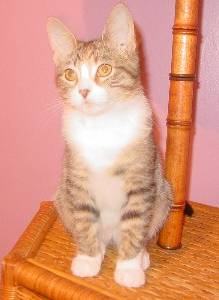

In [9]:
# See the images

img = mpimg.imread("/content/train/cat.10007.jpg")
img

In [10]:
# Count the no of dog and cat images in train data file

filename = os.listdir("/content/train")

dog_count = 0
cat_count = 0

for i in filename:
  name = i[0:3]

  if name=="cat":
    dog_count+=1
  elif name=="dog":
    cat_count+=1

print("The cat images are :- ", cat_count)
print("The dog images are :- ", dog_count)

The cat images are :-  12500
The dog images are :-  12500


In [11]:
# Then resize the image

resized_folder = os.mkdir("resized_folder")

In [12]:
resized_folder = "/content/resized_folder/"
original_folder = "/content/train/"

for i in range(3000):
  filename = os.listdir("/content/train")[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img  = img.convert("RGB")

  folder = resized_folder+filename
  img.save(folder)

In [13]:
# Look at the resized folder names then print out the images to see if they are resized

filename = os.listdir("/content/resized_folder")
print(len(filename))
print(filename)

3000
['cat.516.jpg', 'cat.10150.jpg', 'cat.9147.jpg', 'dog.2153.jpg', 'dog.9703.jpg', 'dog.3012.jpg', 'cat.11883.jpg', 'dog.8492.jpg', 'dog.9155.jpg', 'dog.6490.jpg', 'dog.5838.jpg', 'cat.12127.jpg', 'dog.8427.jpg', 'cat.6551.jpg', 'cat.1880.jpg', 'cat.11763.jpg', 'cat.5404.jpg', 'cat.4833.jpg', 'dog.9022.jpg', 'cat.1397.jpg', 'cat.9536.jpg', 'cat.6892.jpg', 'dog.10555.jpg', 'cat.27.jpg', 'dog.2985.jpg', 'cat.12049.jpg', 'dog.11049.jpg', 'dog.4053.jpg', 'dog.928.jpg', 'cat.4434.jpg', 'dog.3328.jpg', 'dog.11404.jpg', 'cat.9151.jpg', 'cat.5030.jpg', 'dog.2249.jpg', 'cat.5545.jpg', 'dog.2376.jpg', 'dog.7585.jpg', 'cat.9439.jpg', 'dog.4829.jpg', 'dog.4188.jpg', 'cat.7265.jpg', 'dog.2844.jpg', 'dog.5408.jpg', 'cat.685.jpg', 'cat.6220.jpg', 'cat.11975.jpg', 'dog.2626.jpg', 'cat.10040.jpg', 'cat.9208.jpg', 'cat.6010.jpg', 'cat.6093.jpg', 'dog.4416.jpg', 'dog.307.jpg', 'cat.6378.jpg', 'dog.10242.jpg', 'dog.8075.jpg', 'dog.586.jpg', 'cat.6750.jpg', 'dog.11354.jpg', 'dog.6473.jpg', 'cat.8575.jpg

array([[[57, 59, 54],
        [58, 60, 55],
        [59, 61, 56],
        ...,
        [73, 69, 57],
        [73, 69, 57],
        [73, 69, 57]],

       [[57, 59, 54],
        [58, 60, 55],
        [59, 61, 56],
        ...,
        [73, 69, 57],
        [73, 69, 57],
        [73, 69, 57]],

       [[58, 60, 55],
        [59, 61, 56],
        [60, 62, 57],
        ...,
        [73, 69, 57],
        [73, 69, 57],
        [73, 69, 57]],

       ...,

       [[61, 53, 42],
        [61, 53, 42],
        [61, 53, 42],
        ...,
        [41, 34, 26],
        [33, 26, 18],
        [27, 20, 12]],

       [[61, 53, 42],
        [61, 53, 42],
        [61, 53, 42],
        ...,
        [39, 32, 24],
        [31, 24, 16],
        [25, 18, 10]],

       [[61, 53, 42],
        [61, 53, 42],
        [61, 53, 42],
        ...,
        [39, 32, 24],
        [31, 24, 16],
        [25, 18, 10]]], dtype=uint8)
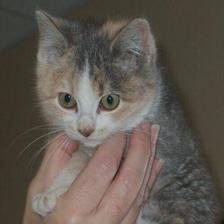

In [14]:
img = mpimg.imread("/content/resized_folder/cat.10002.jpg")
img

In [15]:
# Find the no of images of dogs and cat in a resized folder

dog_count = 0
cat_count = 0

filename = os.listdir("/content/resized_folder")

for i in filename:
  name=i[0:3]

  if name=="dog":
    dog_count+=1
  elif name=="cat":
    cat_count+=1

print("The nos of cat are :- ", cat_count)
print("The nos of dogs are :- ", dog_count)

The nos of cat are :-  1573
The nos of dogs are :-  1427


In [16]:
# Give the images some lables

labels = []

filename = os.listdir("/content/resized_folder")

for i in filename:
  name=i[0:3]

  if name=="dog":
    labels.append(1)
  elif name=="cat":
    labels.append(0)

In [17]:
labels[0:5]

[0, 0, 0, 1, 1]

In [18]:
print(filename[0:5])

['cat.516.jpg', 'cat.10150.jpg', 'cat.9147.jpg', 'dog.2153.jpg', 'dog.9703.jpg']


In [19]:
# Convert the images to numpy array before feeding them to our DL

img_array = []

filename = os.listdir("/content/resized_folder/")

for i in filename:
  path = "/content/resized_folder/"+i

  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  img_array.append(img)

img_array = np.array(img_array)

In [20]:
img_array

array([[[[ 60,  70,  82],
         [ 60,  70,  82],
         [ 60,  70,  82],
         ...,
         [ 31,  37,  51],
         [ 31,  37,  51],
         [ 31,  37,  51]],

        [[ 60,  70,  82],
         [ 60,  70,  82],
         [ 60,  70,  82],
         ...,
         [ 31,  37,  51],
         [ 31,  37,  51],
         [ 31,  37,  51]],

        [[ 60,  70,  82],
         [ 60,  70,  82],
         [ 60,  70,  82],
         ...,
         [ 31,  37,  51],
         [ 31,  37,  51],
         [ 31,  37,  51]],

        ...,

        [[251, 242, 243],
         [247, 238, 239],
         [248, 239, 242],
         ...,
         [135, 120, 139],
         [104,  91, 111],
         [ 93,  80, 100]],

        [[250, 241, 242],
         [246, 237, 238],
         [247, 238, 239],
         ...,
         [138, 123, 142],
         [111,  98, 118],
         [ 97,  85, 105]],

        [[248, 239, 240],
         [245, 236, 237],
         [247, 238, 239],
         ...,
         [137, 124, 142],
        

In [21]:
X = img_array

In [22]:
Y = np.array(labels)

In [23]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Then training and testing

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2, stratify=Y, shuffle=True)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(3000, 224, 224, 3) (2400, 224, 224, 3) (600, 224, 224, 3)


In [27]:
X_train = X_train/255

In [28]:
X_test = X_test/255

Here we just add a wrapped layer and the accuracy we are getting on this is amazing and the prediction it makes is also awesome.

In [29]:
# Now towards building neural netowrk. We are using mobile net one here so import all the libraries.

In [90]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

import tensorflow_hub as hub

In [91]:
# Wrap the hub layer here

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

tf.random.set_seed(3)

mobile_net = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pre_trained = hub.KerasLayer(mobile_net, trainable=False)

# Wrapping the layer

wrapped_layer = keras.layers.Lambda(lambda x:pre_trained(x))

model = keras.Sequential([keras.layers.Input(shape=(224,224,3)),
                          wrapped_layer,
                          keras.layers.Dense(2)

                          ])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,562 (10.01 KB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [95]:
model.save("cat_model.h5")
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,562 (10.01 KB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.fit(X_train, Y_train, validation_split=0.5, epochs=20)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.7927 - loss: 0.4212 - val_accuracy: 0.9775 - val_loss: 0.0814
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step - accuracy: 0.9845 - loss: 0.0700 - val_accuracy: 0.9833 - val_loss: 0.0640
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9873 - loss: 0.0541 - val_accuracy: 0.9817 - val_loss: 0.0604
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9874 - loss: 0.0466 - val_accuracy: 0.9808 - val_loss: 0.0593
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9896 - loss: 0.0411 - val_accuracy: 0.9800 - val_loss: 0.0584
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9897 - loss: 0.0362 - val_accuracy: 0.9808 - val_loss: 0.0568
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9955 - loss: 0.0315 - val_accuracy: 0.9800 - val_loss: 0.0542
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9971 - loss: 0.0268 - val_accuracy: 0.9800 - val_los

In [34]:
loss, accuracy = model.evaluate(X_test, Y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9789 - loss: 0.0375


In [35]:
import cv2

In [61]:
input_img = "/content/cat (2).jpg"

In [62]:
img1 = Image.open(input_img)

In [63]:
img

array([[[[0.60784314, 0.65490196, 0.69411765],
         [0.51764706, 0.56470588, 0.60392157],
         [0.57254902, 0.63137255, 0.66666667],
         ...,
         [0.74901961, 0.79215686, 0.82352941],
         [0.75686275, 0.8       , 0.83137255],
         [0.75686275, 0.8       , 0.83137255]],

        [[0.56470588, 0.62745098, 0.65490196],
         [0.56078431, 0.61568627, 0.63921569],
         [0.5372549 , 0.58823529, 0.61960784],
         ...,
         [0.74901961, 0.80784314, 0.81960784],
         [0.74509804, 0.80392157, 0.81568627],
         [0.74901961, 0.80784314, 0.81960784]],

        [[0.54901961, 0.59607843, 0.64313725],
         [0.56078431, 0.60784314, 0.64705882],
         [0.56470588, 0.61176471, 0.65098039],
         ...,
         [0.76078431, 0.81960784, 0.83137255],
         [0.77647059, 0.81960784, 0.85098039],
         [0.75686275, 0.80392157, 0.83921569]],

        ...,

        [[0.50588235, 0.56862745, 0.61568627],
         [0.42745098, 0.49411765, 0.54117647]

In [64]:
img = cv2.imread(input_img)

In [65]:
img

array([[[ 40,  41,  39],
        [ 40,  41,  39],
        [ 40,  41,  39],
        ...,
        [ 58,  60,  48],
        [ 58,  59,  49],
        [ 59,  60,  50]],

       [[ 40,  41,  39],
        [ 40,  41,  39],
        [ 40,  41,  39],
        ...,
        [ 59,  61,  49],
        [ 58,  59,  49],
        [ 58,  59,  49]],

       [[ 40,  41,  39],
        [ 40,  41,  39],
        [ 40,  41,  39],
        ...,
        [ 57,  61,  50],
        [ 56,  59,  50],
        [ 55,  58,  49]],

       ...,

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [124, 147, 149],
        [116, 139, 141],
        [114, 137, 139]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [127, 150, 152],
        [120, 143, 145],
        [118, 141, 143]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [125, 148, 150],
        [121, 144, 146],
        [120, 143, 145]]

In [66]:
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [67]:
img = cv2.resize(img, (224,224))

In [68]:
img.shape

(224, 224, 3)

In [69]:
img = img/255

In [70]:
np.unique(img)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [71]:
img = np.reshape(img, [1,224,224,3])

In [72]:
prediction = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


In [73]:
print(prediction)

[[ 3.6368458 -3.7770584]]


In [74]:
pred_labels = np.argmax(prediction)

In [75]:
print(pred_labels)

0


In [76]:
if pred_labels==0:
  print("The image represents Cat")
else:
  print("The image represents dog")

The image represents Cat
